In [1]:
#looks at common stocks
# looks at American tech companies listed in https://www.visualcapitalist.com/the-worlds-tech-giants-ranked
#instagram is under facebook, linkedin under microsoft
# Tencent, Samsung, Huawei, Xiaomi and baidu are not American (of course)
#Companies, listed in alphabetical order are (in the stock symbol):
#Apple, ACN, Adobe, Salesforce, Cisco, Dell, Facebook, Google, IBM, Intel, Microsoft, Oracle, SAP

In [64]:
#using the files
import time
import requests
import json
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import numpy as np
from LinRegg import LinRegg
from scipy import linalg
import matplotlib.pyplot as plt
from random import randint
import math

In [3]:
session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('http://', adapter)
session.mount('https://', adapter)
#for now let's throw out DELL
companies = {'AAPL' : [], 'ACN': [], 'ADBE': [], 'CRM': [], 'CSCO': [], 'FB': [], 'GOOGL': [], 'IBM': [], 'INTC': [], 'MSFT': [], 'ORCL': [], 'SAP': []}
companies2019 = {'AAPL' : [], 'ACN': [], 'ADBE': [], 'CRM': [], 'CSCO': [], 'FB': [], 'GOOGL': [], 'IBM': [], 'INTC': [], 'MSFT': [], 'ORCL': [], 'SAP': []}
companies2018 = {'AAPL' : [], 'ACN': [], 'ADBE': [], 'CRM': [], 'CSCO': [], 'FB': [], 'GOOGL': [], 'IBM': [], 'INTC': [], 'MSFT': [], 'ORCL': [], 'SAP': []}
companies2017 = {'AAPL' : [], 'ACN': [], 'ADBE': [], 'CRM': [], 'CSCO': [], 'FB': [], 'GOOGL': [], 'IBM': [], 'INTC': [], 'MSFT': [], 'ORCL': [], 'SAP': []}
companies2016 = {'AAPL' : [], 'ACN': [], 'ADBE': [], 'CRM': [], 'CSCO': [], 'FB': [], 'GOOGL': [], 'IBM': [], 'INTC': [], 'MSFT': [], 'ORCL': [], 'SAP': []}
logCompanies = {'AAPL' : [], 'ACN': [], 'ADBE': [], 'CRM': [], 'CSCO': [], 'FB': [], 'GOOGL': [], 'IBM': [], 'INTC': [], 'MSFT': [], 'ORCL': [], 'SAP': []}
logCompanies2019 = {'AAPL' : [], 'ACN': [], 'ADBE': [], 'CRM': [], 'CSCO': [], 'FB': [], 'GOOGL': [], 'IBM': [], 'INTC': [], 'MSFT': [], 'ORCL': [], 'SAP': []}
logCompanies2018 = {'AAPL' : [], 'ACN': [], 'ADBE': [], 'CRM': [], 'CSCO': [], 'FB': [], 'GOOGL': [], 'IBM': [], 'INTC': [], 'MSFT': [], 'ORCL': [], 'SAP': []}
logCompanies2017 = {'AAPL' : [], 'ACN': [], 'ADBE': [], 'CRM': [], 'CSCO': [], 'FB': [], 'GOOGL': [], 'IBM': [], 'INTC': [], 'MSFT': [], 'ORCL': [], 'SAP': []}
logCompanies2016 = {'AAPL' : [], 'ACN': [], 'ADBE': [], 'CRM': [], 'CSCO': [], 'FB': [], 'GOOGL': [], 'IBM': [], 'INTC': [], 'MSFT': [], 'ORCL': [], 'SAP': []}
for company in companies:
    print(company)
    time.sleep(12)
    r = session.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={0}&outputsize=full&apikey=ENSG5HIMGR91A6O3'.format(company))
    DICT = r.json()
    #dictionary is weird 
    for key in DICT:
        if key == "Time Series (Daily)":
            stockData = DICT[key]      
    for tradeTime in stockData:
        if tradeTime.startswith('2020'):
            companies[company].append(float(stockData[tradeTime]["4. close"])/float(stockData[tradeTime]["1. open"]))
            logCompanies[company].append(np.log(float(stockData[tradeTime]["4. close"])/float(stockData[tradeTime]["1. open"])))
        elif tradeTime.startswith('2019'):
            companies2019[company].append(float(stockData[tradeTime]["4. close"])/float(stockData[tradeTime]["1. open"]))
            logCompanies2019[company].append(np.log(float(stockData[tradeTime]["4. close"])/float(stockData[tradeTime]["1. open"])))
        elif tradeTime.startswith('2018'):
            companies2018[company].append(float(stockData[tradeTime]["4. close"])/float(stockData[tradeTime]["1. open"]))
            logCompanies2018[company].append(np.log(float(stockData[tradeTime]["4. close"])/float(stockData[tradeTime]["1. open"])))
        elif tradeTime.startswith('2017'):
            companies2017[company].append(float(stockData[tradeTime]["4. close"])/float(stockData[tradeTime]["1. open"]))
            logCompanies2017[company].append(np.log(float(stockData[tradeTime]["4. close"])/float(stockData[tradeTime]["1. open"])))
        elif tradeTime.startswith('2016'):
            companies2016[company].append(float(stockData[tradeTime]["4. close"])/float(stockData[tradeTime]["1. open"]))
            logCompanies2016[company].append(np.log(float(stockData[tradeTime]["4. close"])/float(stockData[tradeTime]["1. open"])))
        else:
            break

AAPL
ACN
ADBE
CRM
CSCO
FB
GOOGL
IBM
INTC
MSFT
ORCL
SAP


In [4]:
companyNames = ['AAPL', 'ACN', 'ADBE', 'CRM', 'CSCO', 'FB', 'GOOGL', 'IBM', 'INTC', 'MSFT', 'ORCL', 'SAP']
inputArray = np.zeros((len(companies['AAPL'])-1, len(companyNames)))
outputArray = np.zeros((len(companies['AAPL'])-1, len(companyNames)))
logInputArray = np.zeros((len(logCompanies['AAPL'])-1, len(companyNames)))
logOutputArray = np.zeros((len(logCompanies['AAPL'])-1, len(companyNames)))
for ii in range(len(companies['AAPL']) - 1):
    for jj in range(len(companyNames)):
        inputArray[ii][jj] = companies[companyNames[jj]][ii]
        outputArray[ii][jj] = companies[companyNames[jj]][ii+1]
        logInputArray[ii][jj] = logCompanies[companyNames[jj]][ii]
        logOutputArray[ii][jj] = logCompanies[companyNames[jj]][ii+1]

In [5]:
stockRegg = LinRegg(inputArray, outputArray)
stockRegg.standardizePredictor()
logStockRegg = LinRegg(logInputArray, logOutputArray)
logStockRegg.standardizePredictor()

In [6]:
def MeasureNorm(Y, X, B):
    return 1/2*1/len(Y)*np.trace(np.dot(np.transpose(np.dot(X, B) - Y), np.dot(X, B) - Y))

In [7]:
inputArray2019 = np.zeros((len(companies2019['AAPL'])-1,len(companyNames)))
outputArray2019 = np.zeros((len(companies2019['AAPL'])-1, len(companyNames)))
logInputArray2019 = np.zeros((len(logCompanies2019['AAPL'])-1, len(companyNames)))
logOutputArray2019 = np.zeros((len(logCompanies2019['AAPL'])-1, len(companyNames)))
for ii in range(len(companies2019['AAPL']) - 1):
    for jj in range(len(companyNames)):
        inputArray2019[ii][jj] = companies2019[companyNames[jj]][ii]
        outputArray2019[ii][jj] = companies2019[companyNames[jj]][ii+1]
        logInputArray2019[ii][jj] = logCompanies2019[companyNames[jj]][ii]
        logOutputArray2019[ii][jj] = logCompanies2019[companyNames[jj]][ii+1]
inputArray2019 = stockRegg.standardizeTest(inputArray2019)
logInputArray2019 = logStockRegg.standardizeTest(logInputArray2019)
                                                      

In [8]:
inputArray2018 = np.zeros((len(companies2018['AAPL'])-1,len(companyNames)))
outputArray2018 = np.zeros((len(companies2018['AAPL'])-1, len(companyNames)))
logInputArray2018 = np.zeros((len(logCompanies2018['AAPL'])-1, len(companyNames)))
logOutputArray2018 = np.zeros((len(logCompanies2018['AAPL'])-1, len(companyNames)))
for ii in range(len(companies2018['AAPL']) - 1):
    for jj in range(len(companyNames)):
        inputArray2018[ii][jj] = companies2018[companyNames[jj]][ii]
        outputArray2018[ii][jj] = companies2018[companyNames[jj]][ii+1]
        logInputArray2018[ii][jj] = logCompanies2018[companyNames[jj]][ii]
        logOutputArray2018[ii][jj] = logCompanies2018[companyNames[jj]][ii+1]
inputArray2018 = stockRegg.standardizeTest(inputArray2018)
logInputArray2018 = logStockRegg.standardizeTest(logInputArray2018)
                                                      

In [9]:
inputArray2017 = np.zeros((len(companies2017['AAPL'])-1,len(companyNames)))
outputArray2017 = np.zeros((len(companies2017['AAPL'])-1, len(companyNames)))
logInputArray2017 = np.zeros((len(logCompanies2017['AAPL'])-1, len(companyNames)))
logOutputArray2017 = np.zeros((len(logCompanies2017['AAPL'])-1, len(companyNames)))
for ii in range(len(companies2017['AAPL']) - 1):
    for jj in range(len(companyNames)):
        inputArray2017[ii][jj] = companies2017[companyNames[jj]][ii]
        outputArray2017[ii][jj] = companies2017[companyNames[jj]][ii+1]
        logInputArray2017[ii][jj] = logCompanies2017[companyNames[jj]][ii]
        logOutputArray2017[ii][jj] = logCompanies2017[companyNames[jj]][ii+1]
inputArray2017 = stockRegg.standardizeTest(inputArray2017)
logInputArray2017 = logStockRegg.standardizeTest(logInputArray2017)

In [10]:
inputArray2016 = np.zeros((len(companies2016['AAPL'])-1,len(companyNames)))
outputArray2016 = np.zeros((len(companies2016['AAPL'])-1, len(companyNames)))
logInputArray2016 = np.zeros((len(logCompanies2016['AAPL'])-1, len(companyNames)))
logOutputArray2016 = np.zeros((len(logCompanies2016['AAPL'])-1, len(companyNames)))
for ii in range(len(companies2016['AAPL']) - 1):
    for jj in range(len(companyNames)):
        inputArray2016[ii][jj] = companies2016[companyNames[jj]][ii]
        outputArray2016[ii][jj] = companies2016[companyNames[jj]][ii+1]
        logInputArray2016[ii][jj] = logCompanies2016[companyNames[jj]][ii]
        logOutputArray2016[ii][jj] = logCompanies2016[companyNames[jj]][ii+1]
inputArray2016 = stockRegg.standardizeTest(inputArray2016)
logInputArray2016 = logStockRegg.standardizeTest(logInputArray2016)

In [11]:
def trade(money, percent, x, y, B):
    moneyToBet = money*percent
    predict = np.dot(x, B)
    bestIndex = np.argmax(predict)
    if predict[bestIndex] <= 1:
        return money
    else:
        money += moneyToBet*y[bestIndex]
        money -= moneyToBet
        return money
        
        

In [12]:
def logTrade(money, percent, x, y, B):
    moneyToBet = money*percent
    predict = np.dot(x, B)
    bestIndex = np.argmax(predict)
    if predict[bestIndex] <= 0:
        return money
    else:
        money += moneyToBet*np.exp(y[bestIndex])
        money -= moneyToBet
        return money

In [13]:
def testPercent(percent, inputA, outputA, bestFit):
    MONEY = 1000
    for ii in range(len(outputA)-1, -1, -1):
        MONEY = trade(MONEY, percent, inputA[ii], outputA[ii], bestFit)
    return MONEY/1000


In [14]:
def logTestPercent(percent, inputA, outputA, bestFit):
    MONEY = 1000
    for ii in range(len(outputA)-1, -1, -1):
        MONEY = logTrade(MONEY, percent, inputA[ii], outputA[ii], bestFit)
    return MONEY/1000

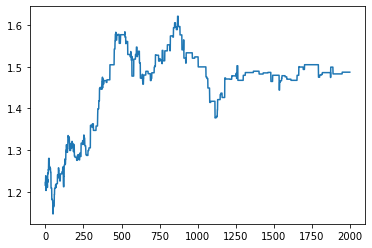

In [15]:
graphingX = np.arange(0, 2000, 0.5)
graphingY2019 = np.zeros(4000)
for ii in range(len(graphingX)):
    tempRidgeBestFit = stockRegg.RSSRidgeSolve(graphingX[ii])
    graphingY2019[ii] = testPercent(1, inputArray2019, outputArray2019, tempRidgeBestFit)
plt.plot(graphingX, graphingY2019)

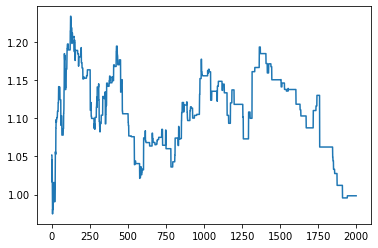

In [16]:
graphingX = np.arange(0, 2000, 0.5)
graphingY2018 = np.zeros(4000)
for ii in range(len(graphingX)):
    tempRidgeBestFit = stockRegg.RSSRidgeSolve(graphingX[ii])
    graphingY2018[ii] = testPercent(1, inputArray2018, outputArray2018, tempRidgeBestFit)
plt.plot(graphingX, graphingY2018)

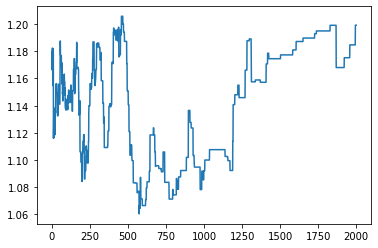

In [17]:
graphingX = np.arange(0, 2000, 0.5)
graphingY2017 = np.zeros(4000)
for ii in range(len(graphingX)):
    tempRidgeBestFit = stockRegg.RSSRidgeSolve(graphingX[ii])
    graphingY2017[ii] = testPercent(1, inputArray2017, outputArray2017, tempRidgeBestFit)
plt.plot(graphingX, graphingY2017)

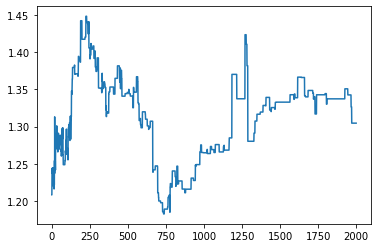

In [18]:
graphingX = np.arange(0, 2000, 0.5)
graphingY2016 = np.zeros(4000)
for ii in range(len(graphingX)):
    tempRidgeBestFit = stockRegg.RSSRidgeSolve(graphingX[ii])
    graphingY2016[ii] = testPercent(1, inputArray2016, outputArray2016, tempRidgeBestFit)
plt.plot(graphingX, graphingY2016)

In [19]:
total2 = np.multiply(graphingY2019, graphingY2018)
print(total2)
ind2 = np.argmax(total2)
print(ind2/2)
print(total2[ind2])

[1.28577376 1.27754529 1.29111816 ... 1.48469001 1.48469001 1.48469001]
462.0
1.8212155291428636


In [20]:
total3 = np.multiply(total2, graphingY2017)
print(total3)
ind3 = np.argmax(total3)
print(ind3/2)
print(total3[ind3])

[1.51609404 1.49024477 1.51096726 ... 1.78047132 1.78047132 1.78047132]
462.0
2.195979327830902


In [21]:
total4 = np.multiply(total3, graphingY2016)
print(total4)
ind4 = np.argmax(total4)
print(ind4/2)
print(total4[ind4])

[1.83157166 1.80034352 1.87336922 ... 2.32265125 2.32265125 2.32265125]
460.0
2.9865829246326645


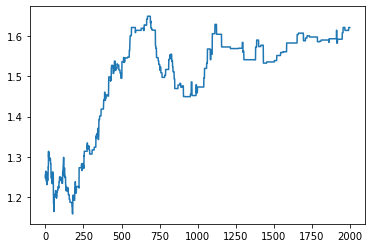

In [22]:
graphingX = np.arange(0, 2000, 0.5)
logGraphingY2019 = np.zeros(4000)
for ii in range(len(graphingX)):
    tempRidgeBestFit = logStockRegg.RSSRidgeSolve(graphingX[ii])
    logGraphingY2019[ii] = logTestPercent(1, logInputArray2019, logOutputArray2019, tempRidgeBestFit)
plt.plot(graphingX, logGraphingY2019)

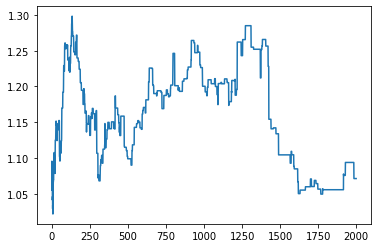

In [23]:
graphingX = np.arange(0, 2000, 0.5)
logGraphingY2018 = np.zeros(4000)
for ii in range(len(graphingX)):
    tempRidgeBestFit = logStockRegg.RSSRidgeSolve(graphingX[ii])
    logGraphingY2018[ii] = logTestPercent(1, logInputArray2018, logOutputArray2018, tempRidgeBestFit)
plt.plot(graphingX, logGraphingY2018)

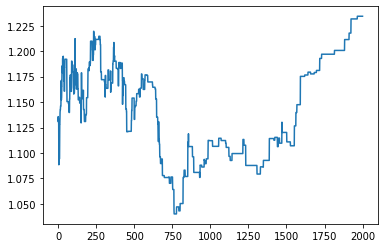

In [24]:
graphingX = np.arange(0, 2000, 0.5)
logGraphingY2017 = np.zeros(4000)
for ii in range(len(graphingX)):
    tempRidgeBestFit = logStockRegg.RSSRidgeSolve(graphingX[ii])
    logGraphingY2017[ii] = logTestPercent(1, logInputArray2017, logOutputArray2017, tempRidgeBestFit)
plt.plot(graphingX, logGraphingY2017)

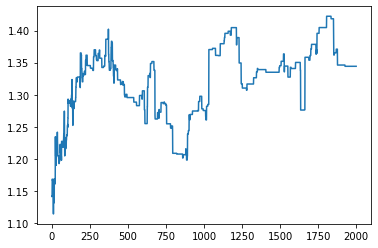

In [25]:
graphingX = np.arange(0, 2000, 0.5)
logGraphingY2016 = np.zeros(4000)
for ii in range(len(graphingX)):
    tempRidgeBestFit = logStockRegg.RSSRidgeSolve(graphingX[ii])
    logGraphingY2016[ii] = logTestPercent(1, logInputArray2016, logOutputArray2016, tempRidgeBestFit)
plt.plot(graphingX, logGraphingY2016)

In [26]:
logTotal2 = np.multiply(logGraphingY2019, logGraphingY2018)
print(logTotal2)
logInd2 = np.argmax(logTotal2)
print(logInd2/2)
print(logTotal2[logInd2])

[1.37421623 1.32903043 1.33388268 ... 1.73650483 1.73650483 1.73650483]
1293.0
2.035703168078876


In [27]:
logTotal3 = np.multiply(logTotal2, logGraphingY2017)
print(logTotal3)
logInd3 = np.argmax(logTotal3)
print(logInd3/2)
print(logTotal3[logInd3])

[1.55572474 1.5094557  1.51380978 ... 2.14343341 2.14343341 2.14343341]
640.0
2.3084459164799234


In [28]:
logTotal4 = np.multiply(logTotal3, logGraphingY2016)
print(logTotal4)
logInd4 = np.argmax(logTotal4)
print(logInd4/2)
print(logTotal4[logInd4])

[1.77577126 1.72295778 1.72792772 ... 2.88148015 2.88148015 2.88148015]
640.0
3.069694867889347


In [56]:
#control
def randomTrade(stockData, money):
    randomInd = randint(1, len(stockData)-1)
    return money*stockData[randomInd]
    
        

In [57]:
def randomAlgo(allStocks, money):
    originalMoney = money
    for day in allStocks:
        money = randomTrade(day, money)
    return money/originalMoney

In [107]:
totalYear = np.append(np.append(np.append(np.flip(outputArray2016), np.flip(outputArray2017), axis=0), np.flip(outputArray2018), axis=0), np.flip(outputArray2019), axis=0)
allRandoms = []
for ii in range(10000):
    allRandoms.append(randomAlgo(totalYear, 1000))
allRandoms = np.array(allRandoms)

In [108]:
print(max(allRandoms))
print(min(allRandoms))
print(np.mean(allRandoms))
print(allRandoms)

3.2787593637321795
0.5193608728460581
1.4134386200497988
[1.17015473 1.08941989 1.6209549  ... 1.60317924 1.18253246 1.94917795]


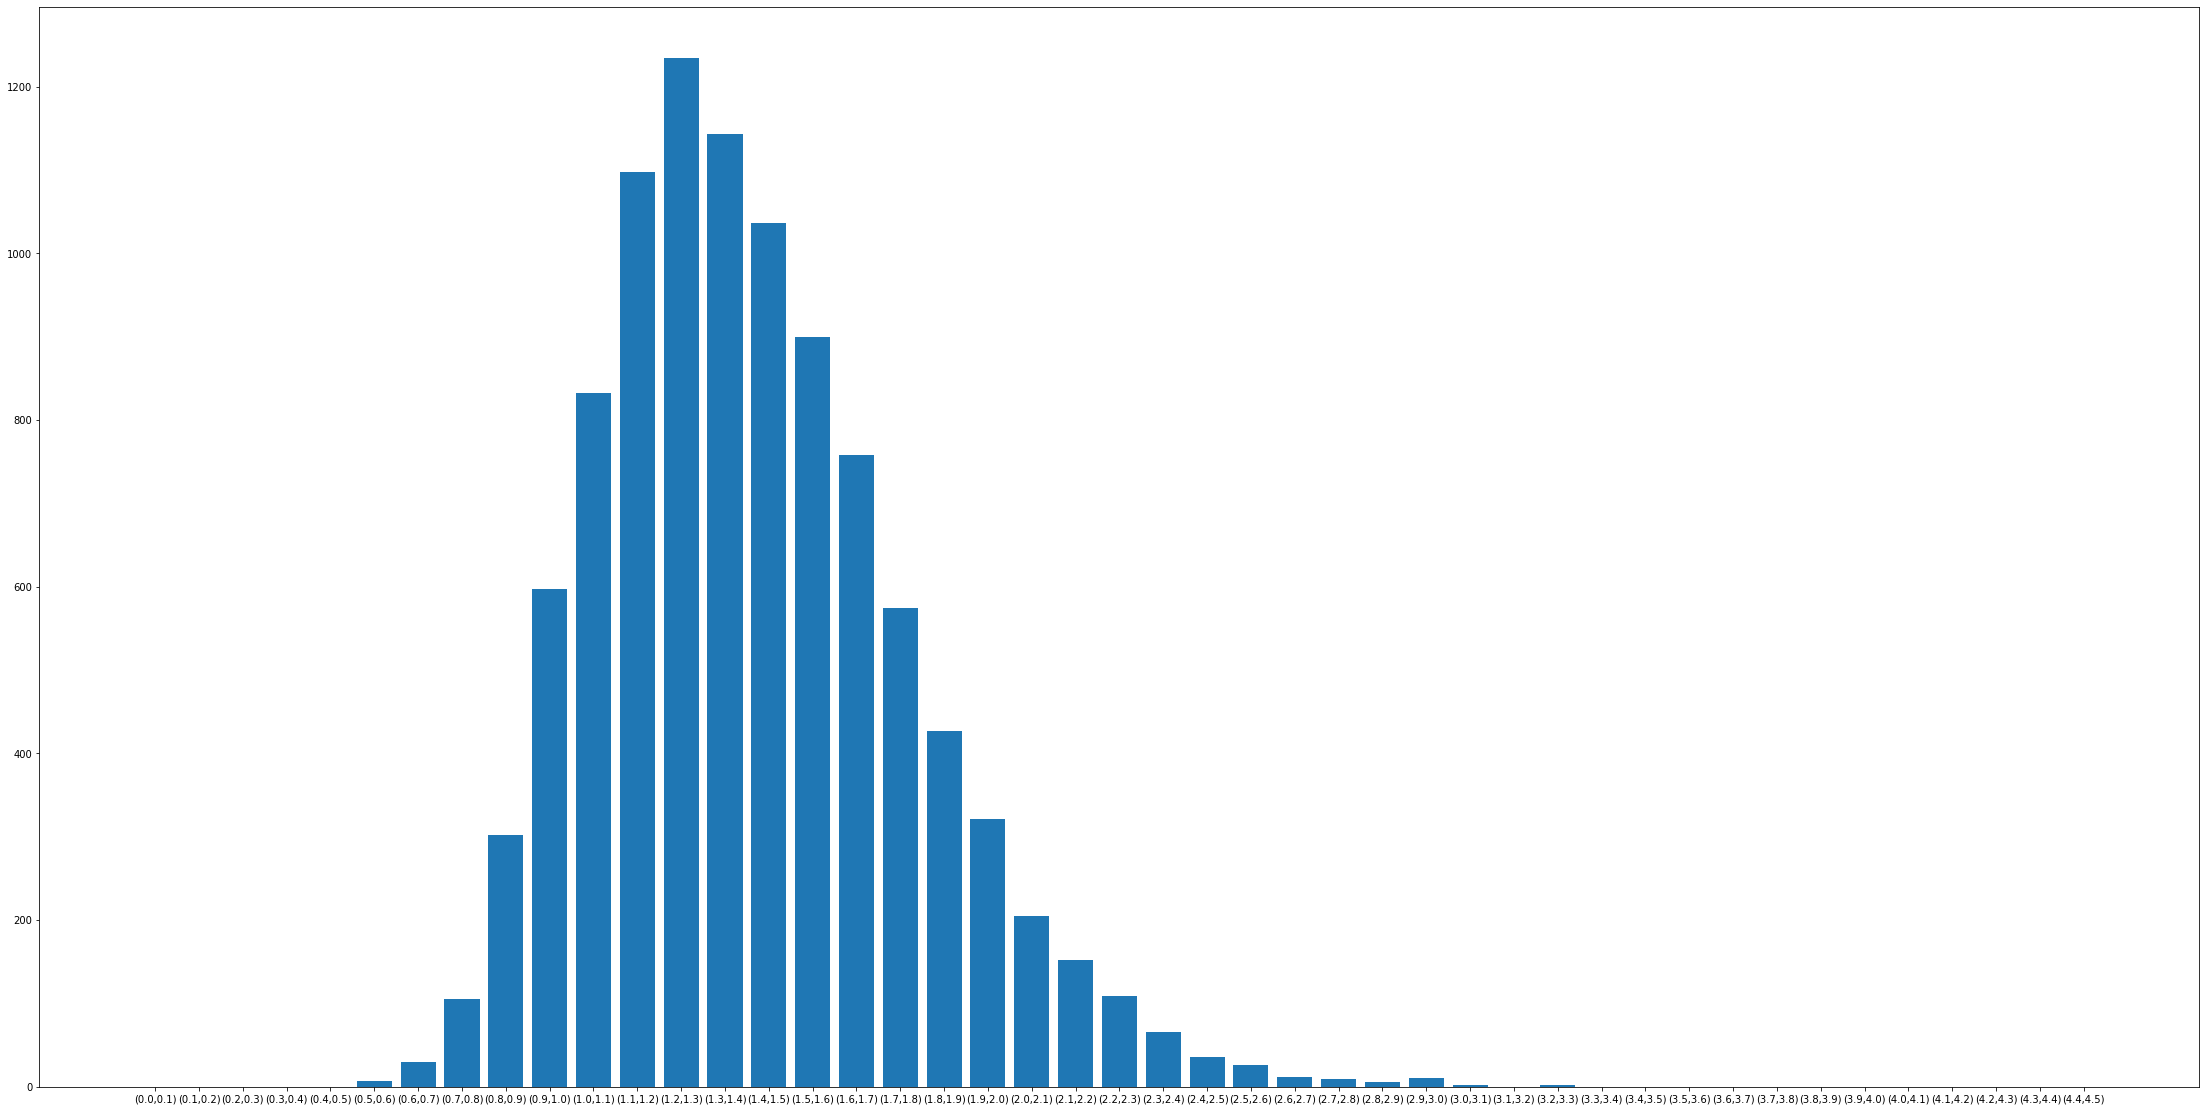

In [109]:
rangeLst = []
nameLst = []
for ii in np.arange(0, 4.5, 0.1):
    rangeLst.append(len(allRandoms[(ii <= allRandoms) & (allRandoms < ii + 0.1)]))
    nameLst.append('({0},{1})'.format(round(ii, 1), round(ii+0.1, 1)))

fig = plt.figure(figsize=(30, 15))
ax = fig.add_axes([0,0,1,1])
ax.bar(nameLst,rangeLst)
plt.show()



In [110]:
totalYear = np.append(np.append(np.append(np.flip(outputArray2016), np.flip(outputArray2017), axis=0), np.flip(outputArray2018), axis=0), np.flip(outputArray2019), axis=0)
allRandoms2 = []
for ii in range(10000):
    allRandoms2.append(randomAlgo(totalYear, 1000))
allRandoms2 = np.array(allRandoms2)

In [111]:
print(max(allRandoms2))
print(min(allRandoms2))
print(np.mean(allRandoms2))

3.4380731280645302
0.47520139035014164
1.4136408606273663


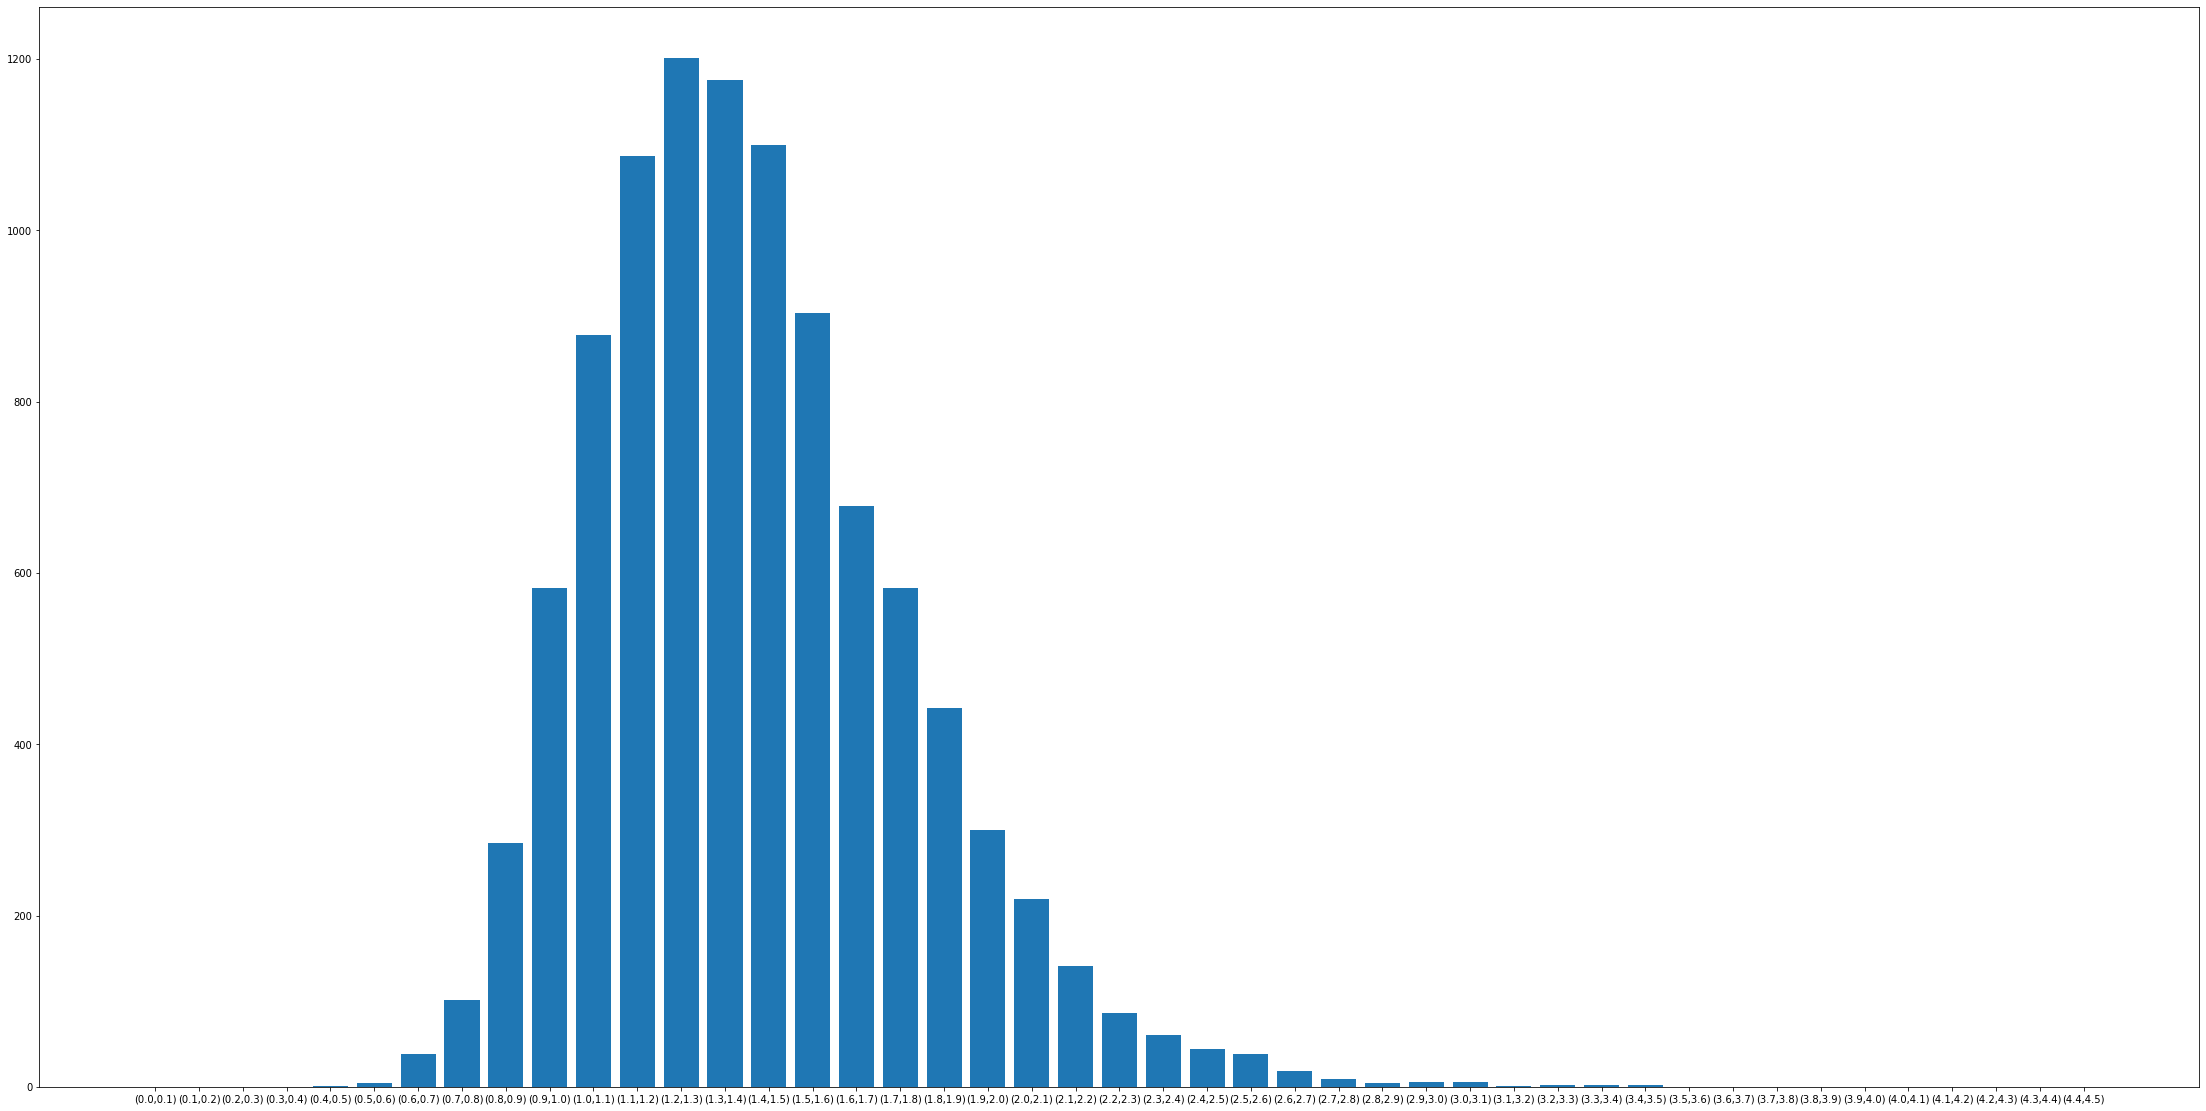

In [112]:
rangeLst = []
nameLst = []
for ii in np.arange(0, 4.5, 0.1):
    allRandoms2[(ii <= allRandoms2) & (allRandoms2 < ii + 0.1)]
    rangeLst.append(len(allRandoms2[(ii <= allRandoms2) & (allRandoms2 < ii + 0.1)]))
    nameLst.append('({0},{1})'.format(round(ii, 1), round(ii+0.1, 1)))

fig = plt.figure(figsize=(30, 15))
ax = fig.add_axes([0,0,1,1])
ax.bar(nameLst,rangeLst)
plt.show()


In [114]:
totalYear = np.append(np.append(np.append(np.flip(outputArray2016), np.flip(outputArray2017), axis=0), np.flip(outputArray2018), axis=0), np.flip(outputArray2019), axis=0)
allRandoms3 = []
for ii in range(10000):
    allRandoms3.append(randomAlgo(totalYear, 1000))
allRandoms3 = np.array(allRandoms3)

In [115]:
print(max(allRandoms3))
print(min(allRandoms3))
print(np.mean(allRandoms3))

3.1368990383307045
0.5121874475828051
1.4164906827353263


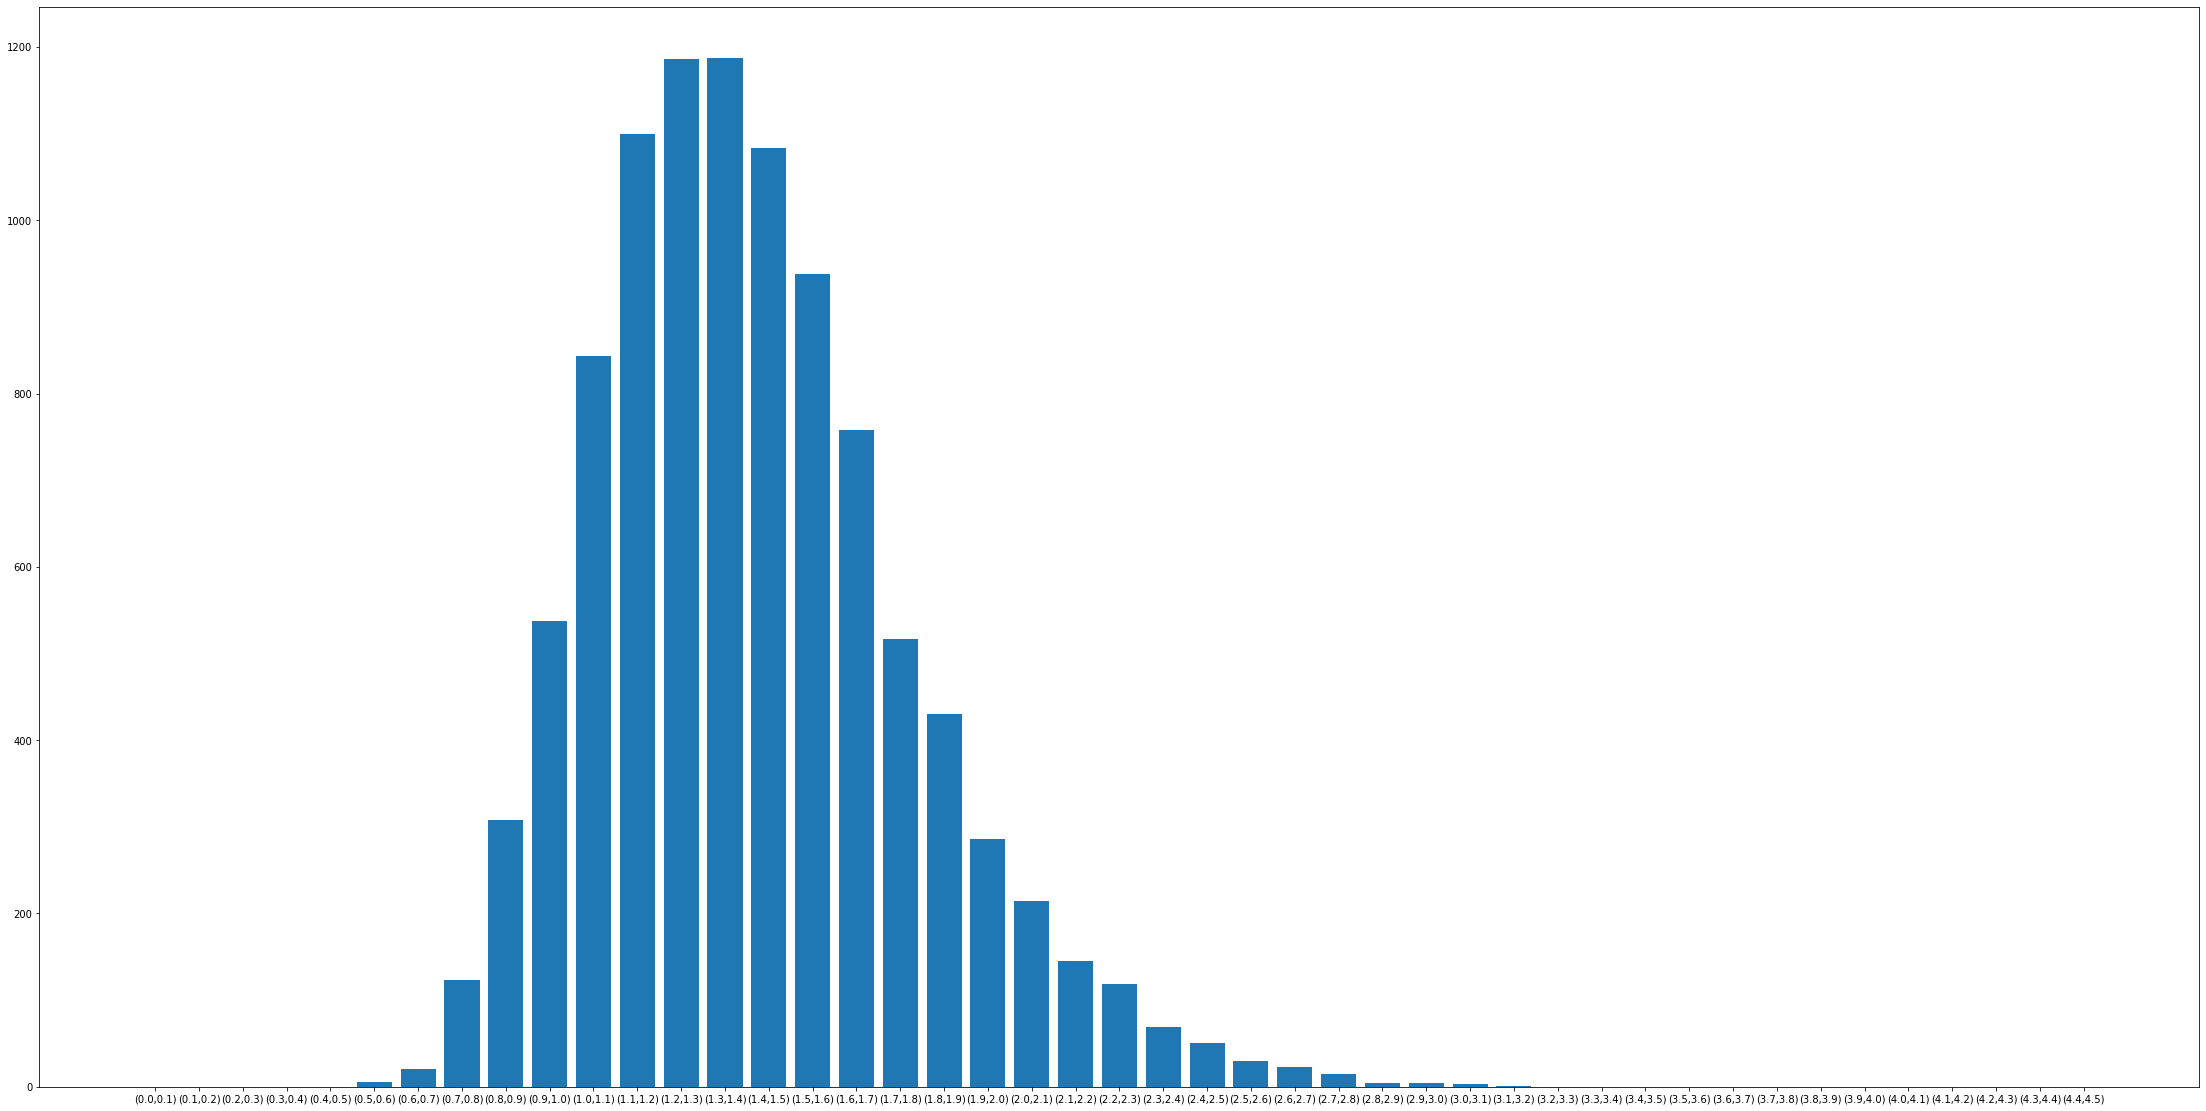

In [116]:
rangeLst = []
nameLst = []
for ii in np.arange(0, 4.5, 0.1):
    allRandoms3[(ii <= allRandoms3) & (allRandoms3 < ii + 0.1)]
    rangeLst.append(len(allRandoms3[(ii <= allRandoms3) & (allRandoms3 < ii + 0.1)]))
    nameLst.append('({0},{1})'.format(round(ii, 1), round(ii+0.1, 1)))

fig = plt.figure(figsize=(30, 15))
ax = fig.add_axes([0,0,1,1])
ax.bar(nameLst,rangeLst)
plt.show()

In [119]:
print(len(allRandoms[3.069694867889347 <= allRandoms]) + 1)
print(len(allRandoms2[3.069694867889347 <= allRandoms2]) + 1)
print(len(allRandoms3[3.069694867889347 <= allRandoms3]) + 1)

4
9
2


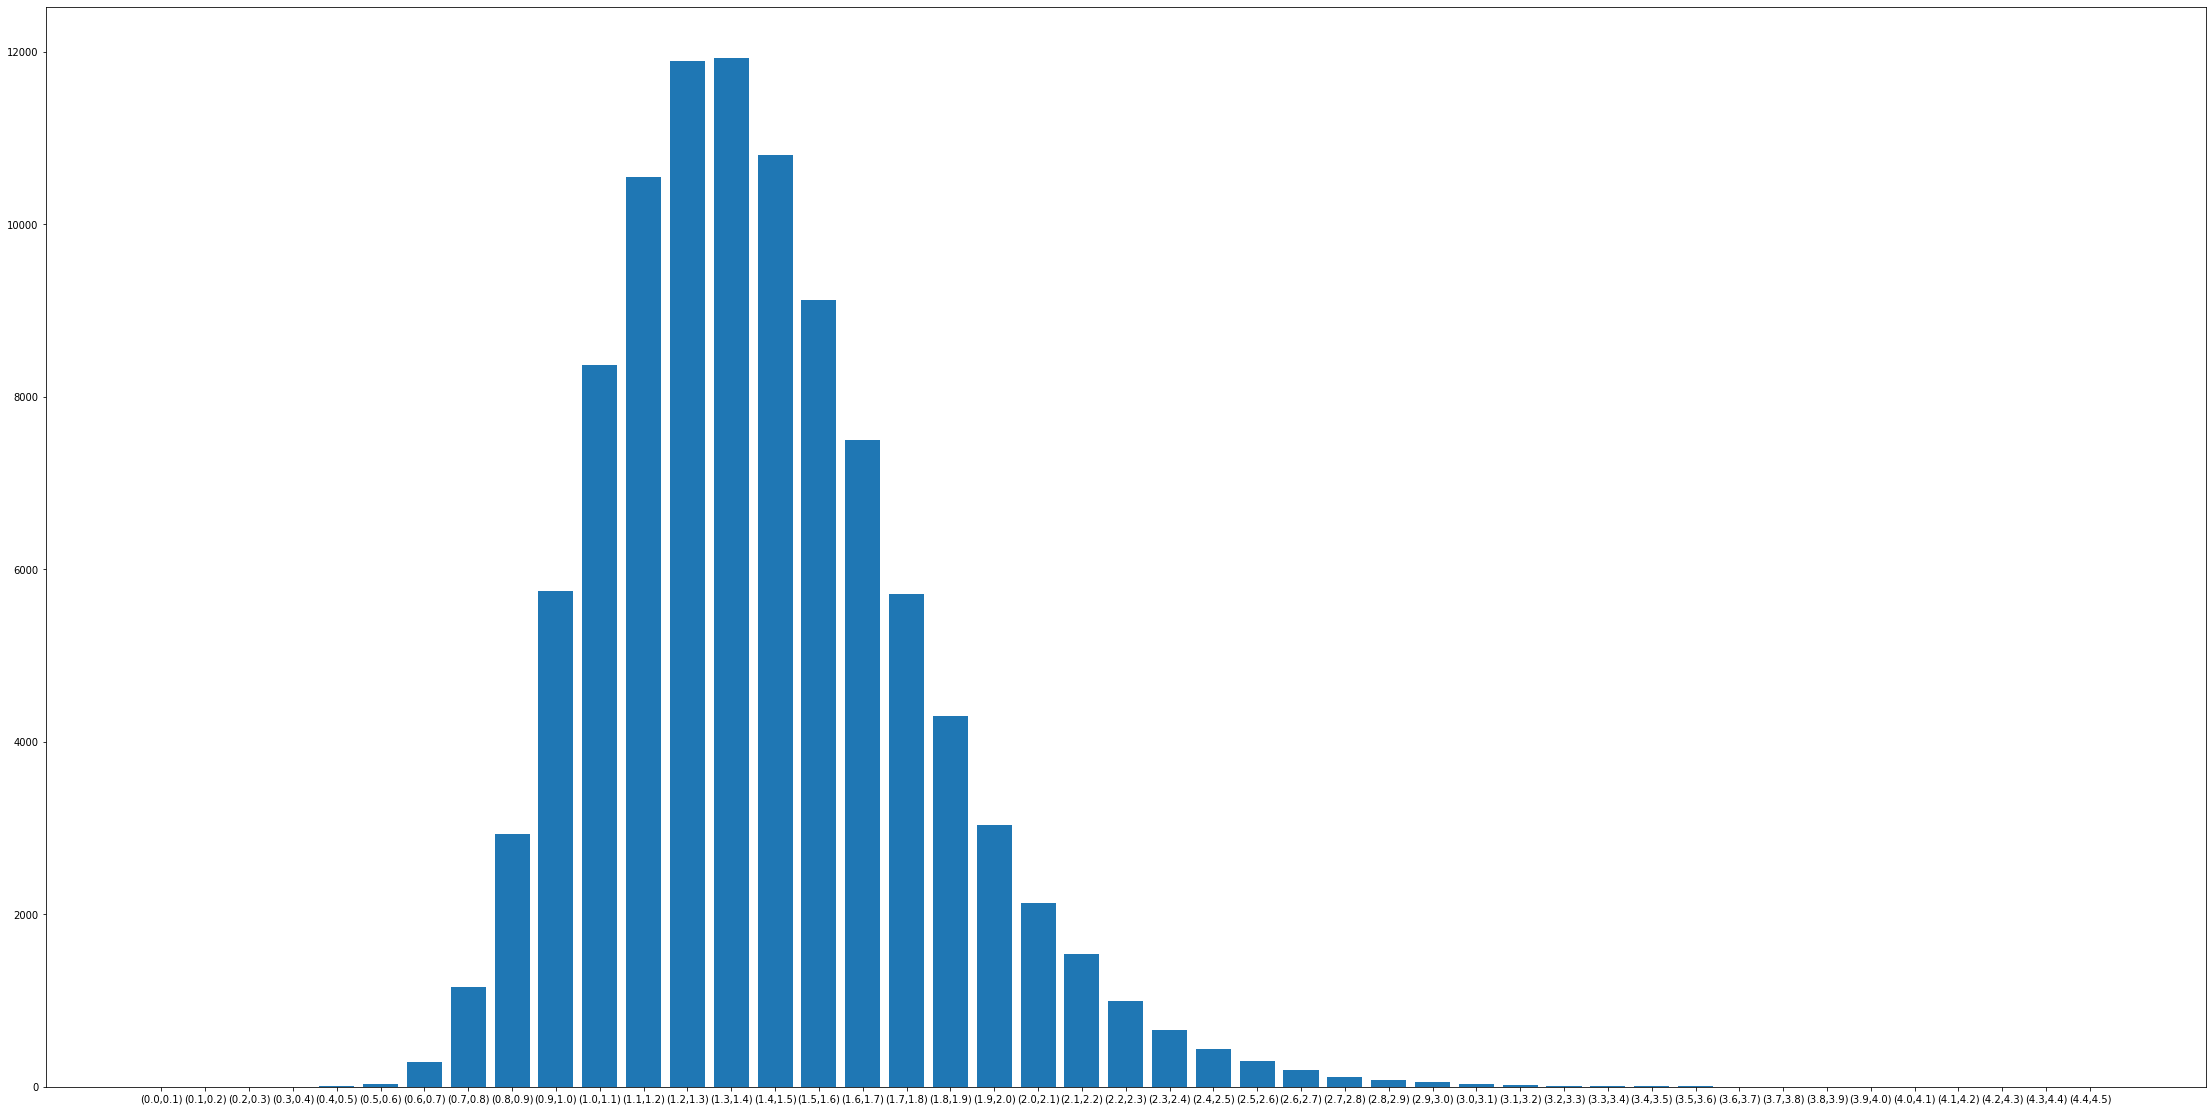

In [120]:
totalYear = np.append(np.append(np.append(np.flip(outputArray2016), np.flip(outputArray2017), axis=0), np.flip(outputArray2018), axis=0), np.flip(outputArray2019), axis=0)
allRandomsSuper = []
for ii in range(100000):
    allRandomsSuper.append(randomAlgo(totalYear, 1000))
allRandomsSuper = np.array(allRandomsSuper)
for ii in np.arange(0, 4.5, 0.1):
    allRandomsSuper[(ii <= allRandomsSuper) & (allRandomsSuper < ii + 0.1)]
    rangeLst.append(len(allRandomsSuper[(ii <= allRandomsSuper) & (allRandomsSuper < ii + 0.1)]))
    nameLst.append('({0},{1})'.format(round(ii, 1), round(ii+0.1, 1)))

fig = plt.figure(figsize=(30, 15))
ax = fig.add_axes([0,0,1,1])
ax.bar(nameLst,rangeLst)
plt.show()

In [122]:
print(max(allRandomsSuper))
print(min(allRandomsSuper))
print(np.mean(allRandomsSuper))
print(np.std(allRandomsSuper))

4.014402189415138
0.3942079110312438
1.4180993754826812
0.3585223175383179


In [124]:
print(max(totalYear[0]))

1.0267030503849526
